<h1 id="tocheading">Chapter4 便捷函数</h1>
<div id="toc"></div>

相关知识点

+ np.cov 计算协方差
+ np.polyfit 多项式拟合
+ np.roots 求根
+ np.polyder 求导
+ np.polyval 多项式预测
+ np.sign 判断符号
    - `np.piecewise(arr, [arr <0, arr >0], [-1, 1])`
+ np.vectorize 类似于python中map函数
+ np.hanning 加权余弦窗函数
    - 其他平滑函数:  hamming, blackman, bartlett, kaiser
+ np.trim_zeros 去除 0 元素

In [202]:
import numpy as np

In [203]:
bhp_c,bhp_v = np.loadtxt('input/BHP.csv', delimiter=',', usecols=(6,7), unpack=True)
vale_c,vale_v = np.loadtxt('input/VALE.csv', delimiter=',', usecols=(6,7), unpack=True)

## 相关性分析

+ cov 计算协方差 矩阵
+ diagonal 查看对角线元素
+ trace 矩阵的迹， 即对角线上元素之和


>协方差矩阵中对角线上的元素并不相等，和相关系数矩阵不同


两个向量的相关系数被定义为协方差除以各自标准差的乘积。


$corr(a,b) = \cfrac{cov(a,b)}{\sigma _a \cdot \sigma _b}$

In [204]:
# 收益率

bhp_return = np.diff(np.log(bhp_c))
vale_return = np.diff(np.log(vale_c))

In [205]:
covariance = np.cov(bhp_return, vale_return)
covariance

array([[ 0.00028388,  0.00019942],
       [ 0.00019942,  0.00030675]])

In [206]:
covariance.diagonal()

array([ 0.00028388,  0.00030675])

In [207]:
covariance.trace()

0.00059063218575060934

In [208]:
covariance/(bhp_return.std() * vale_return.std())

array([[ 0.99634533,  0.69993182],
       [ 0.69993182,  1.07663884]])

In [209]:
print("correlation coefficient ")
np.corrcoef(bhp_return, vale_return)

correlation coefficient 


array([[ 1.        ,  0.67579624],
       [ 0.67579624,  1.        ]])

相关系数矩阵关于对角线对称，对角线元素为1，非计算得到， 0.67为相关BHP,VALE相关系数，价格相关性还是不够

### 判断股票走势是否同步

如不同步，可交易，等待同步

In [210]:
difference = bhp_c - vale_c
avg = np.mean(difference)
dev = np.std(difference)

np.abs(difference[-1] - avg) > 2 * dev

False

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

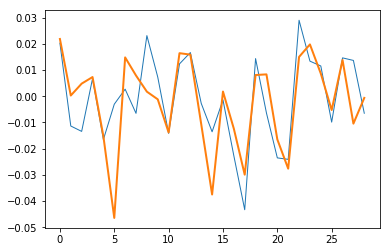

In [212]:
t = np.arange(len(bhp_return))

plt.plot(t,bhp_return,lw=1)
plt.plot(t, vale_return, lw=2)

## 多项式

### 多项式拟合

In [213]:
bhp = np.loadtxt('input/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
vale = np.loadtxt('input/VALE.csv', delimiter=',', usecols=(6), unpack=True)
t = np.arange(len(bhp))

In [214]:
N = 3
poly = np.polyfit(t, bhp - vale, N)
poly

array([  1.11655581e-03,  -5.28581762e-02,   5.80684638e-01,
         5.79791202e+01])

In [215]:
print("预测下次值")

np.polyval(poly, t[-1] + 1)

预测下次值


57.974307608100688

理想情况下BHP 和VALE 股票收盘价越小越好,极限情况下，差值可以在某个点为0.使用 roots 函数，找出拟合多项式函数什么时候可以到0

In [216]:
print("Roots")
np.roots(poly)

Roots


array([ 35.48624287+30.62717062j,  35.48624287-30.62717062j,
       -23.63210575 +0.j        ])

In [217]:
der = np.polyder(poly)

print("多项式函数的导数依然是多项式\n导数为")
der

多项式函数的导数依然是多项式
导数为


array([ 0.00334967, -0.10571635,  0.58068464])

In [218]:
print("导函数的根,即原多项式的极值点为")
np.roots(der)

导函数的根,即原多项式的极值点为


array([ 24.47820054,   7.08205278])

In [219]:
print("多项式函数值")
vals = np.polyval(poly,t)
vals

多项式函数值


array([ 57.97912023,  58.50806325,  58.93798925,  59.27559757,
        59.52758754,  59.7006585 ,  59.80150977,  59.83684071,
        59.81335064,  59.73773889,  59.6167048 ,  59.45694771,
        59.26516696,  59.04806186,  58.81233177,  58.56467601,
        58.31179393,  58.06038485,  57.81714811,  57.58878304,
        57.38198898,  57.20346527,  57.05991124,  56.95802622,
        56.90450955,  56.90606056,  56.96937859,  57.10116298,
        57.30811305,  57.59692815])

In [220]:
print("最大值：{}".format(np.argmax(vals)))
print("最小值：{}".format(np.argmin(vals)))

最大值：7
最小值：24


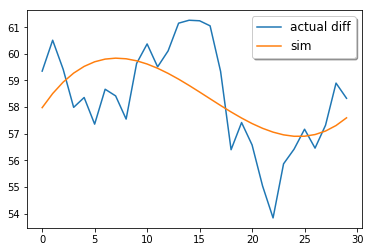

In [221]:

plt.plot(t,bhp - vale, label = "actual diff")
plt.plot(t,vals, label = "sim")
plt.legend(loc = 'best', shadow=True, fontsize = 'large')
# vals.shape

### 净成交额

OBV

In [222]:
c, v = np.loadtxt('input/BHP.csv', delimiter=',', usecols=(6,7), unpack=True)

In [223]:
change = np.diff(c)
change

array([ 1.92, -1.08, -1.26,  0.63, -1.54, -0.28,  0.25, -0.6 ,  2.15,
        0.69, -1.33,  1.16,  1.59, -0.26, -1.29, -0.13, -2.12, -3.91,
        1.28, -0.57, -2.07, -2.07,  2.5 ,  1.18,  1.03, -0.88,  1.31,
        1.24, -0.59])

In [224]:
signs = np.sign(change)
signs

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

In [225]:
pieces = np.piecewise(change, [change <0, change >0], [-1, 1])
pieces

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

In [226]:
np.array_equal(signs, pieces)

True

OBV依赖前一日收盘价，所以，去掉数组v第一个值

In [227]:
print("on balance volume ")
v[1:]*signs

on balance volume 


array([ 2620800., -2461300., -3270900.,  2650200., -4667300., -5359800.,
        7768400., -4799100.,  3448300.,  4719800., -3898900.,  3727700.,
        3379400., -2463900., -3590900., -3805000., -3271700., -5507800.,
        2996800., -3434800., -5008300., -7809799.,  3947100.,  3809700.,
        3098200., -3500200.,  4285600.,  3918800., -3632200.])

### 避免使用循环

In [228]:
o,h,l,c = np.loadtxt('input/BHP.csv', delimiter=',', usecols=(3,4,5,6), unpack=True)

In [229]:
buy_rate = 0.999
def calc_profit(oopen, high, low, close):
    buy = oopen * buy_rate
    if low < buy < high:
        return (close - buy)/buy
    else:
        return 0.0
    

In [230]:
func = np.vectorize(calc_profit)

In [231]:
profits = func(o,h,l,c)

In [232]:
profits

array([ 0.00755895,  0.0123267 ,  0.0021668 ,  0.00780612,  0.        ,
        0.00154302, -0.01006869,  0.00568316, -0.00614746,  0.00560552,
       -0.00121617, -0.01774473,  0.00675817,  0.00225356, -0.00274807,
       -0.02015786,  0.00762307, -0.00675369, -0.00675957,  0.        ,
        0.01065112,  0.02904986, -0.01558377,  0.00168882, -0.0098442 ,
       -0.00499634, -0.00783465,  0.00603003,  0.00540779,  0.00376864])

In [233]:
real_trades = profits[profits != 0]
print("trade days {}, trade percent {}".format(len(real_trades), round(100.0 * len(real_trades)/len(c),2)))
print("average profit/loss {}".format(round(np.mean(real_trades)*100,2)))

trade days 28, trade percent 93.33
average profit/loss 0.02


In [234]:
winning_trades = profits[profits >0]
print("number of winning trades {}".format(len(winning_trades)))
print("{} %".format(round(100.0 * len(winning_trades)/len(c),2)))
print("average profit {}%".format(round(np.mean(winning_trades)*100, 2)))

number of winning trades 16
53.33 %
average profit 0.72%


In [235]:
losing_trades = profits[profits < 0]
print("Number of losing trades {}".format(len(losing_trades)))
print("{} %".format(round(100.0 * len(losing_trades)/len(c),2)))
print("average losing {}%".format(round(np.mean(losing_trades)*100, 2)))

Number of losing trades 12
40.0 %
average losing -0.92%


### 数据平滑

In [236]:
N= 8
weights = np.hanning(N)
weights

array([ 0.        ,  0.1882551 ,  0.61126047,  0.95048443,  0.95048443,
        0.61126047,  0.1882551 ,  0.        ])

In [237]:
bhp = np.loadtxt('input/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
bhp_returns = np.diff(bhp)/bhp[:-1]
# np.diff(np.log(bhp))
smooth_bhp = np.convolve(weights/weights.sum(),bhp_returns)[N-1: -N+1]

vale =  np.loadtxt('input/VALE.csv', delimiter=',', usecols=(6,), unpack=True)
vale_returns = np.diff(vale)/vale[:-1]
smooth_vale = np.convolve(weights/weights.sum(), vale_returns)[N-1 : -N+1]

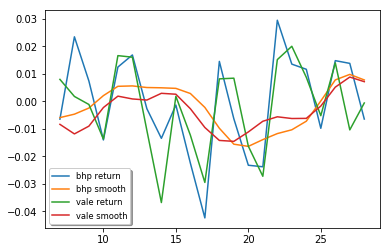

In [238]:
t= np.arange(N -1, len(bhp_returns))
plt.plot(t, bhp_returns[N-1:], label = 'bhp return')
plt.plot(t, smooth_bhp, label = 'bhp smooth')
plt.plot(t, vale_returns[N-1:], label = 'vale return')
plt.plot(t, smooth_vale, label = 'vale smooth')

plt.legend(loc = 'best', shadow=True, fontsize = 'small')

In [239]:
# 多项式拟合平滑后数据
K = 8
t = np.arange(N -1, len(bhp_returns))
poly_bhp = np.polyfit(t, smooth_bhp, K)
poly_vale = np.polyfit(t, smooth_vale, K)

In [240]:
poly_sub = np.polysub(poly_bhp, poly_vale)
xpoints = np.roots(poly_sub)
print("Intersection points ")
xpoints

Intersection points 


array([ 27.73321597+0.j        ,  27.51284094+0.j        ,
        24.32064343+0.j        ,  18.86423973+0.j        ,
        12.43797190+1.73218179j,  12.43797190-1.73218179j,
         6.34613053+0.62519463j,   6.34613053-0.62519463j])

In [241]:
reals = np.isreal(xpoints)
reals

array([ True,  True,  True,  True, False, False, False, False], dtype=bool)

In [242]:
xpoints = np.select([reals], [xpoints])
xpoints = xpoints.real
print("实数交叉点")
xpoints

实数交叉点


array([ 27.73321597,  27.51284094,  24.32064343,  18.86423973,
         0.        ,   0.        ,   0.        ,   0.        ])

In [243]:
np.trim_zeros(xpoints)

array([ 27.73321597,  27.51284094,  24.32064343,  18.86423973])

In [244]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>